## Residual plots for forward selected feature set on linear regression

### Residual Plots
Non-linearity of Data, Non-Constant Variance of Error Terms, Outliers, High Leverage Points

### Residuals vs time
Correlation of Error Terms


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('LassoForwardSelectionDataSetForModelling.csv')
#lassoFeatures = pd.read_csv('top10predictorsLasso_cv.csv')['0'].tolist()
forwardSelectionFeatures = pd.read_csv('ForwardSelectionVia5FoldCV.csv')["0"].tolist()

y_qualitative = df['AboveAverageLifeExpectancyByYear']
y_quantitative = df['Life expectancy at birth, total (years)']
#xLasso = df[np.intersect1d(df.columns, lassoFeatures)]
xFowardSelection = df[np.intersect1d(df.columns, forwardSelectionFeatures)]

forwardSelectionFeatures

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Arable land (% of land area)',
 'Arable land (hectares per person)',
 'CO2 emissions from solid fuel consumption (kt)',
 'GDP per capita (current US$)',
 'Merchandise exports by the reporting economy, residual (% of total merchandise exports)',
 'Merchandise trade (% of GDP)',
 'Permanent cropland (% of land area)',
 'Population density (people per sq. km of land area)',
 'Urban population (% of total)']

In [9]:
from sklearn import metrics
modelAll = LinearRegression()
modelAll.fit(xFowardSelection, y_quantitative)
y_pred = modelAll.predict(xFowardSelection)

In [87]:
#create residual vs. predictor plot for feature
def residualVsPredictor(feature, resid, prefix):
    plt.clf()
    X = df[feature]
#    plt.scatter(X,y)
    plt.scatter(X,resid, s=1)
    plt.xlabel(feature)
    plt.ylabel('Residual')
    plt.title(feature + ' vs Residual')
    plt.savefig("plots\\residuals\\" + prefix + feature + ".jpg", dpi=300)
    plt.show()


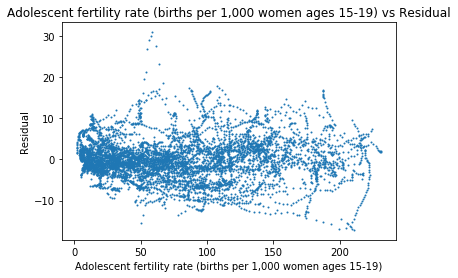

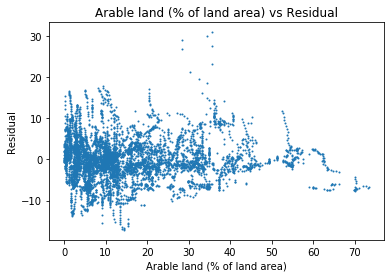

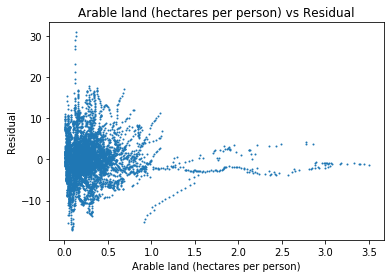

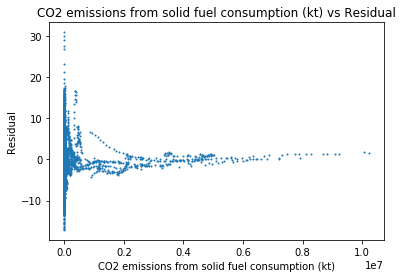

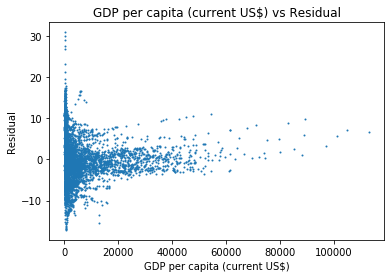

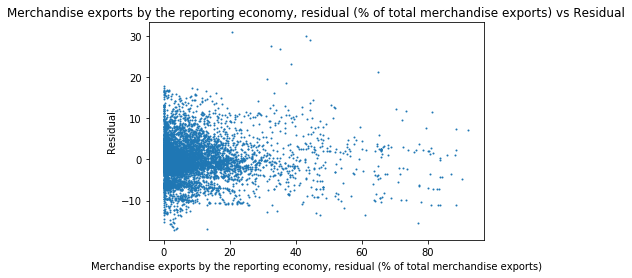

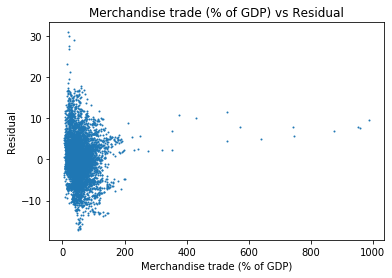

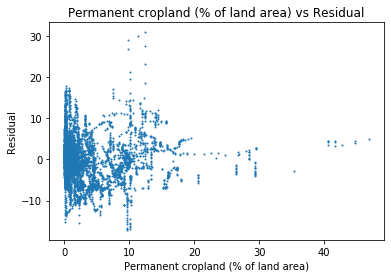

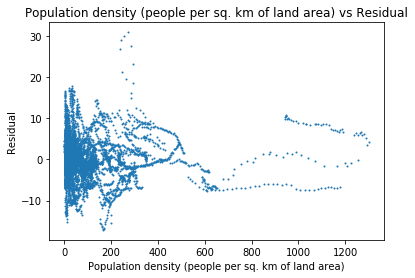

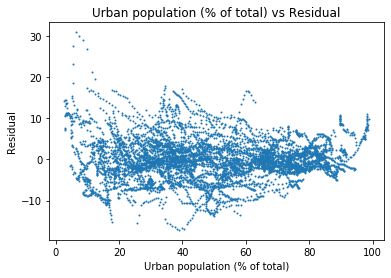

In [98]:
resid = y_pred - y_quantitative
import os
#os.mkdir('plots\\residuals')
for feature in forwardSelectionFeatures:
    residualVsPredictor(feature, resid, 'residuals_')


### Residuals vs time

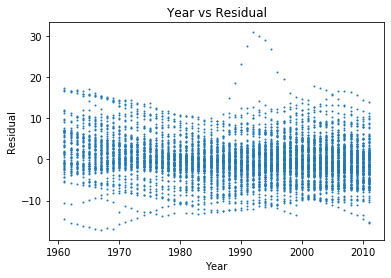

In [57]:
residualVsPredictor('Year', resid)

In [78]:
byCountryResiduals = pd.merge(df['Year'], resid, left_index=True, right_index=True)
byCountryResiduals = pd.merge(df['CountryName'], byCountryResiduals, left_index=True, right_index=True)
byCountryResiduals

,CountryName,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,1964,12.024537
1,Australia,1964,-1.214943
2,Austria,1964,-1.681592
3,Benin,1964,16.495518
4,Bolivia,1964,15.904026
...,...,...,...
6254,United Kingdom,1963,-2.340742
6255,United States,1963,-3.304820
6256,Uruguay,1963,1.200533
6257,"Venezuela, RB",1963,-1.625229


In [104]:
def plotByCountryTimeResiduals(country):
    plt.clf()
    countryResiduals = byCountryResiduals[byCountryResiduals['CountryName'] == country]
    X = countryResiduals['Year']
    resid = countryResiduals['Life expectancy at birth, total (years)']
    plt.scatter(X, resid, s=10)
    plt.xlabel(feature)
    plt.ylabel('Residual')
    plt.title('Year vs Residual for ' + country)
    plt.savefig("plots\\residuals\\country_year_residuals_for_" + country + ".jpg", dpi=300)
    plt.show()

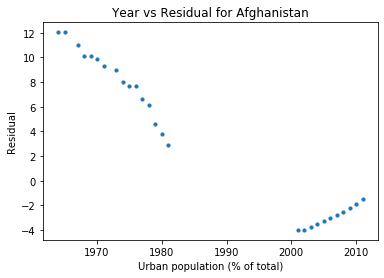

In [106]:
plotByCountryTimeResiduals('Afghanistan')

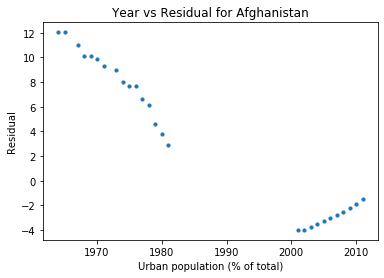

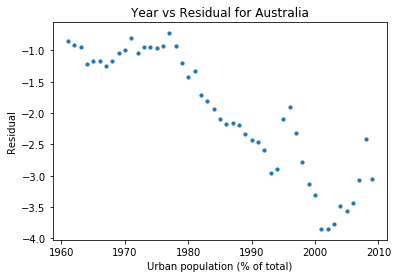

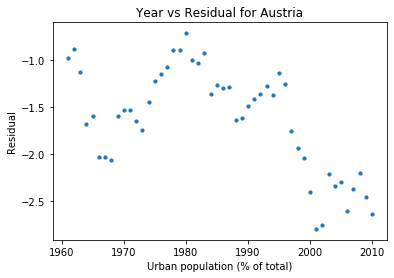

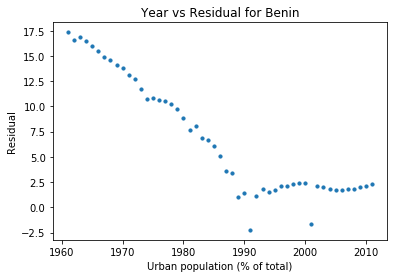

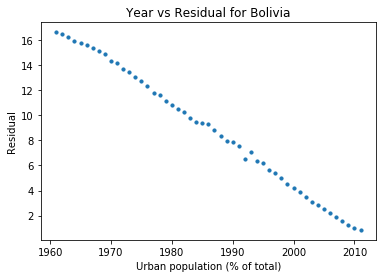

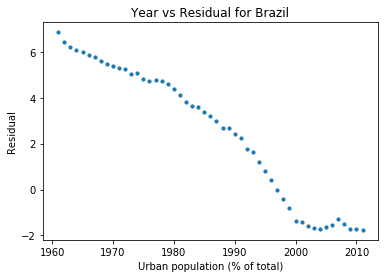

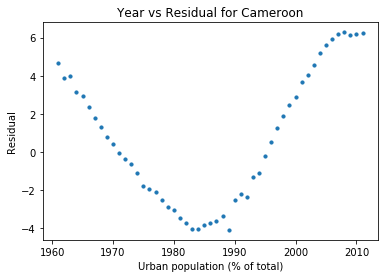

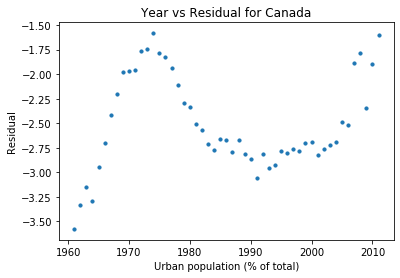

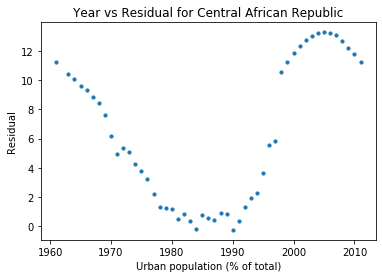

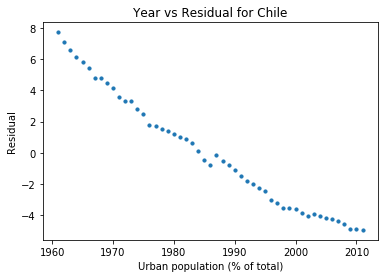

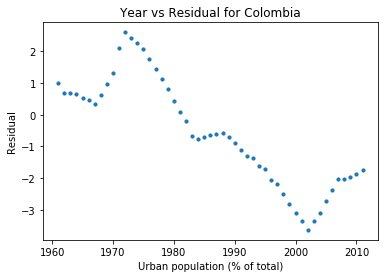

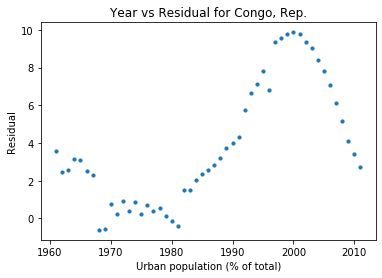

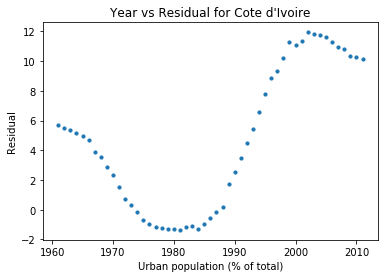

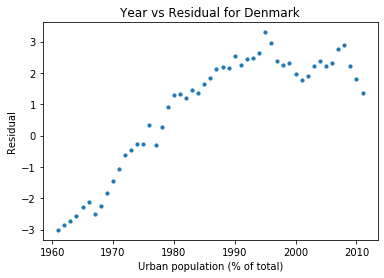

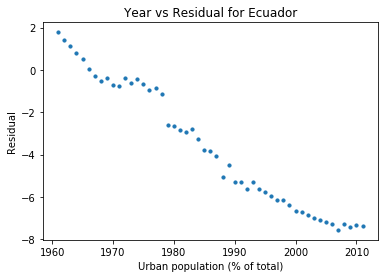

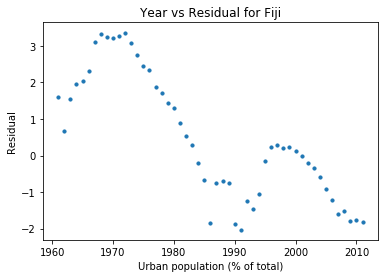

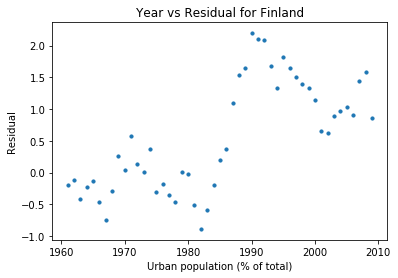

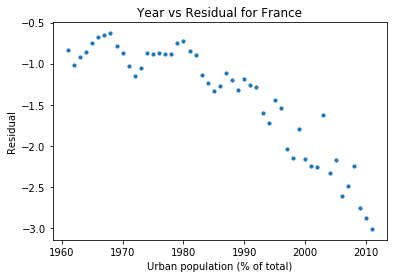

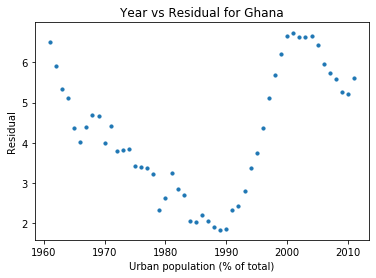

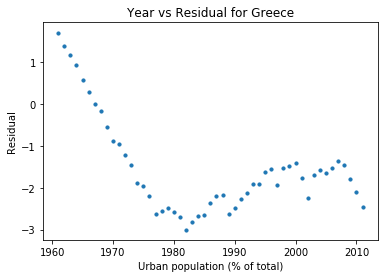

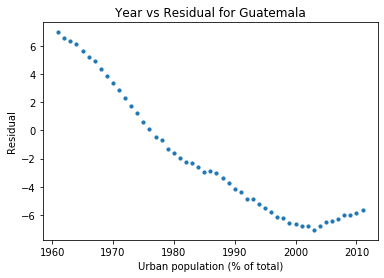

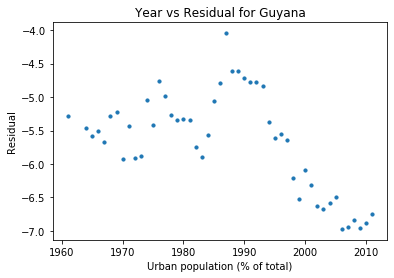

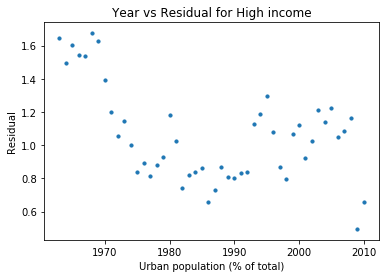

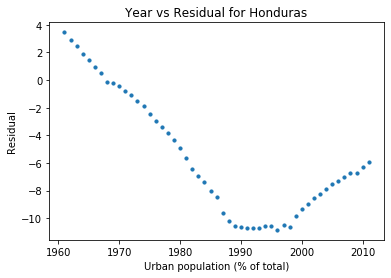

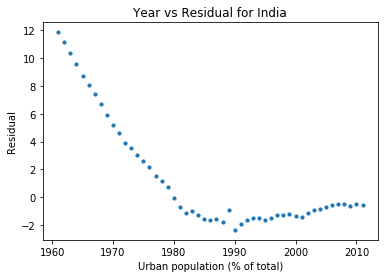

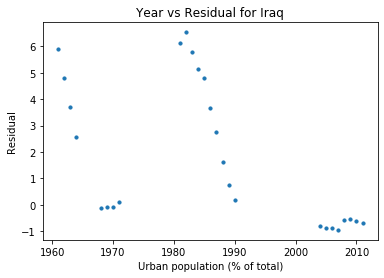

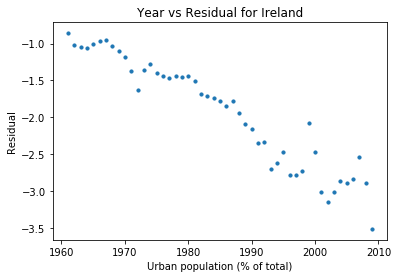

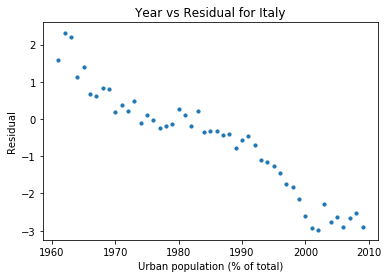

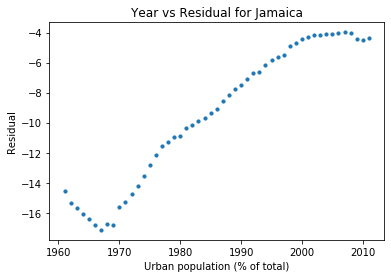

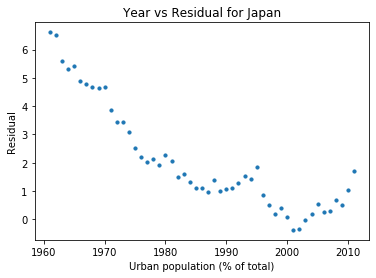

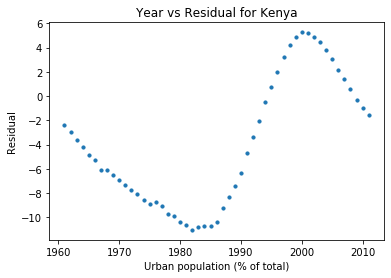

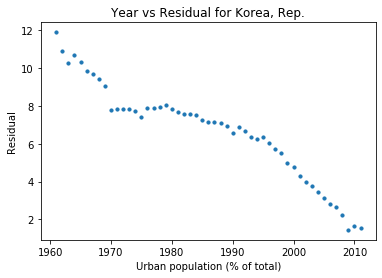

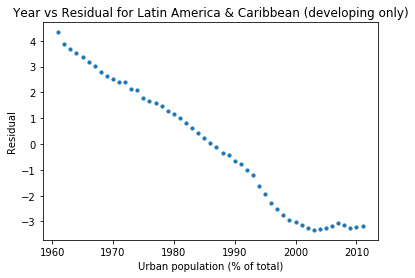

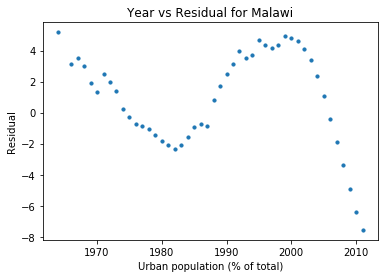

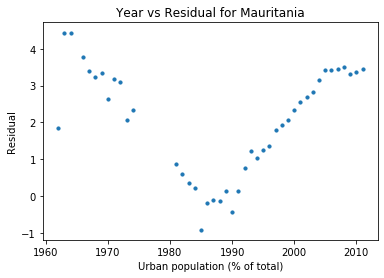

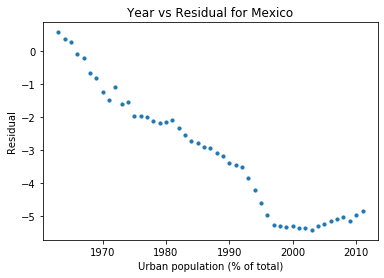

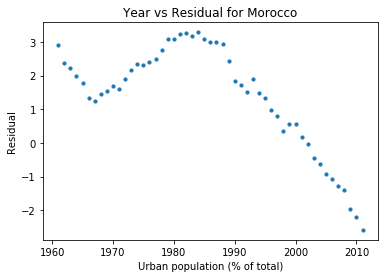

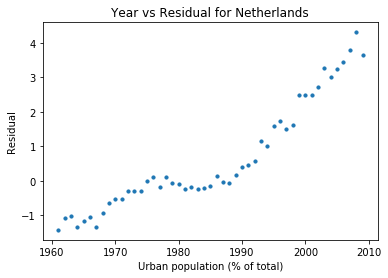

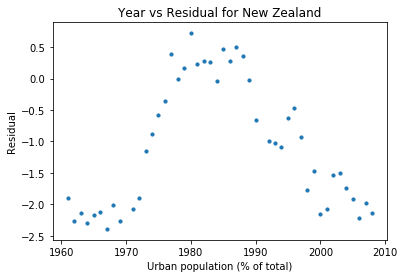

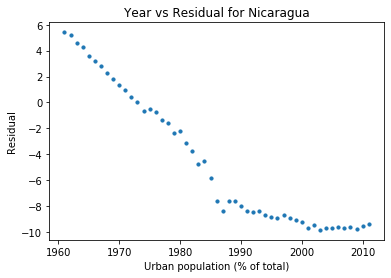

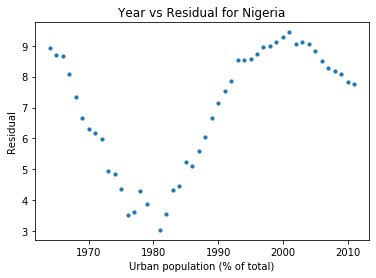

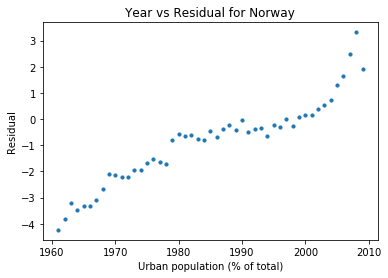

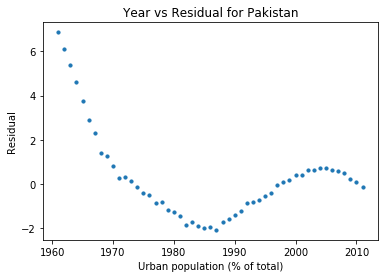

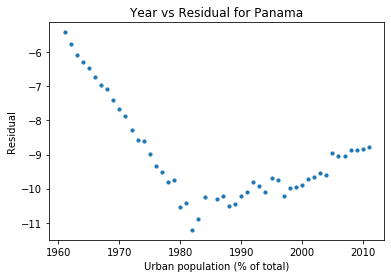

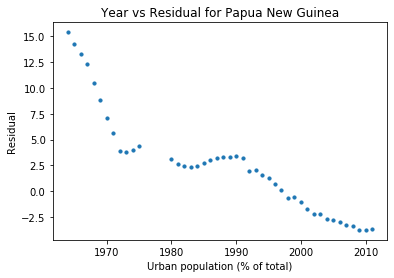

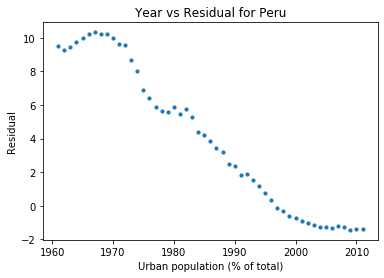

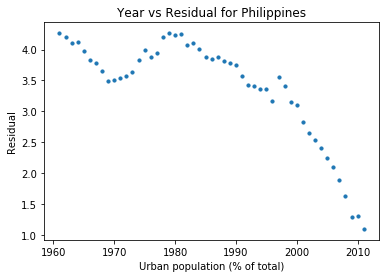

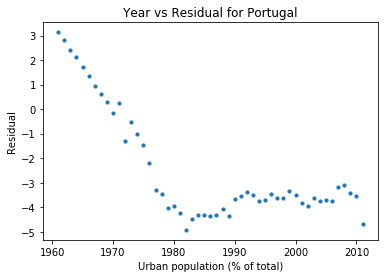

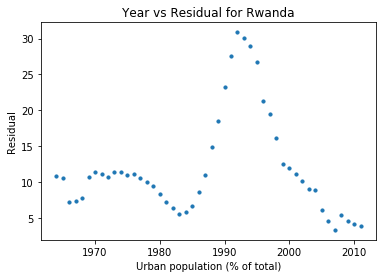

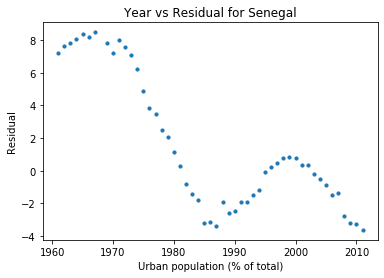

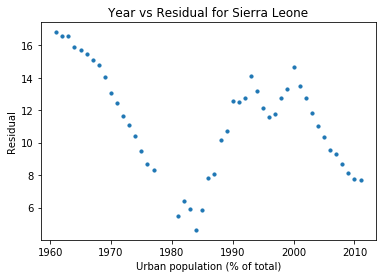

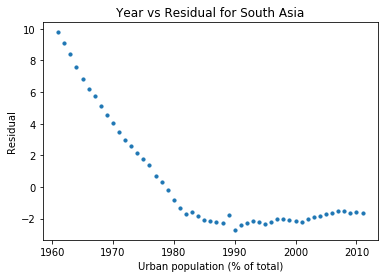

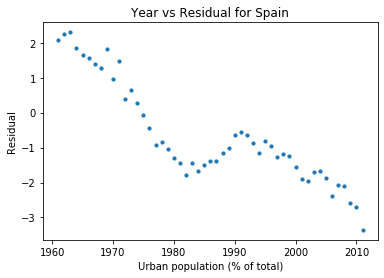

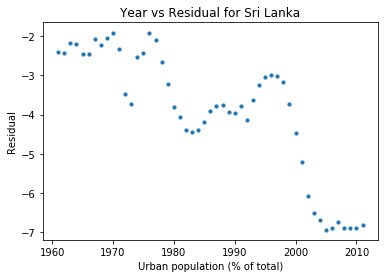

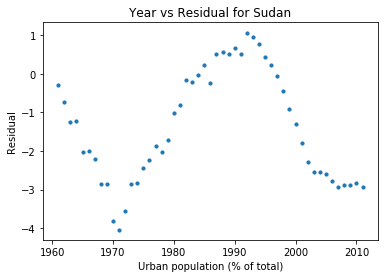

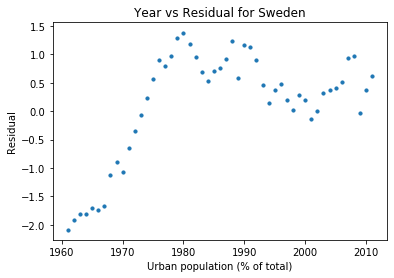

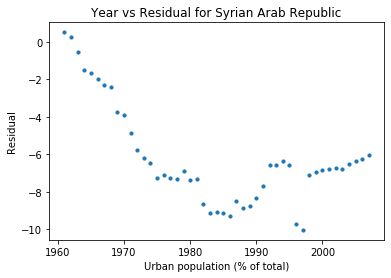

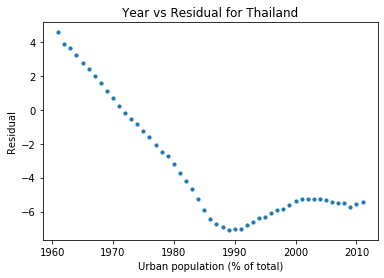

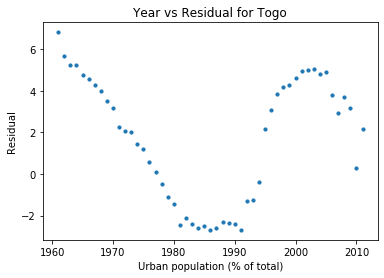

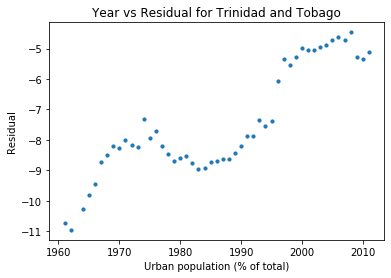

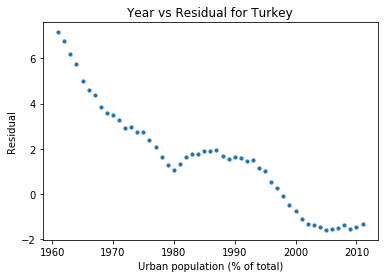

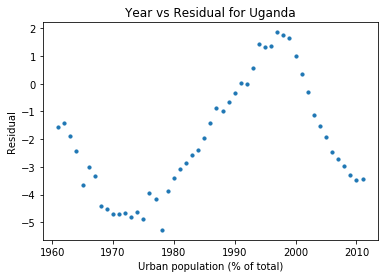

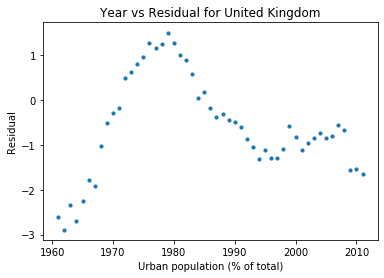

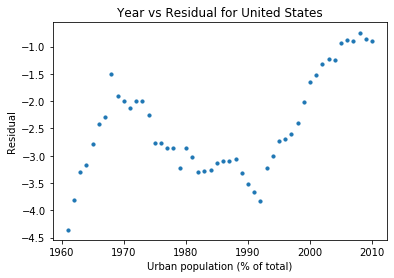

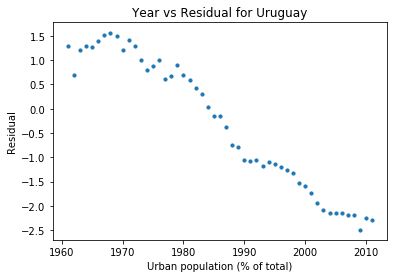

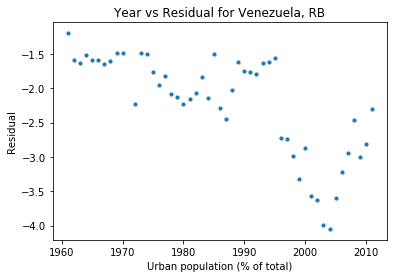

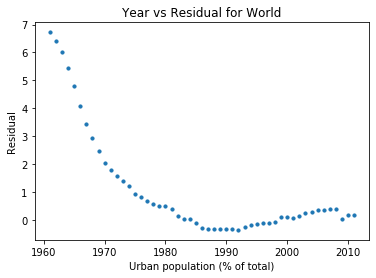

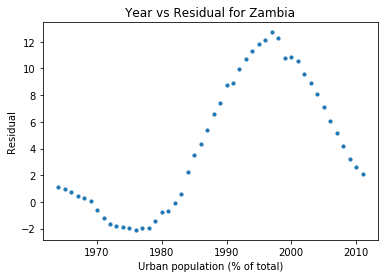

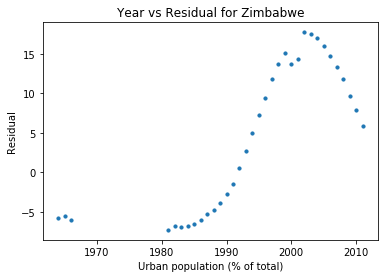

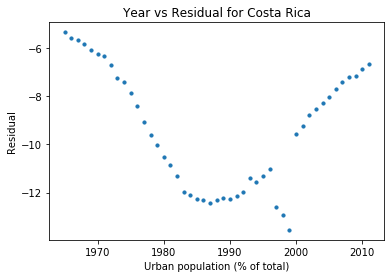

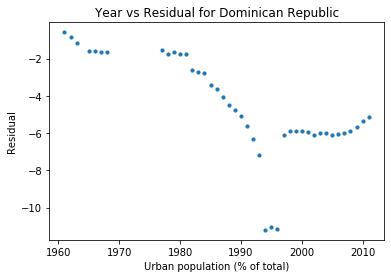

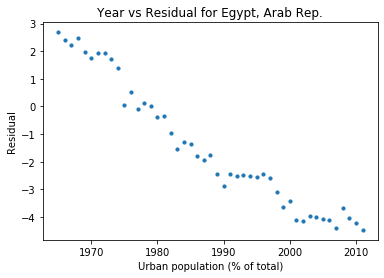

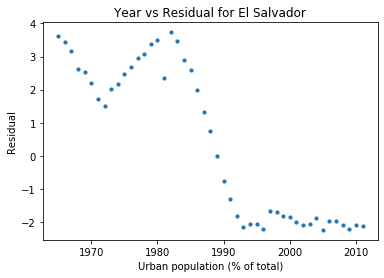

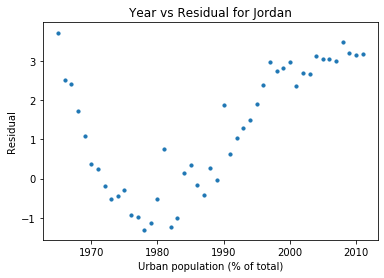

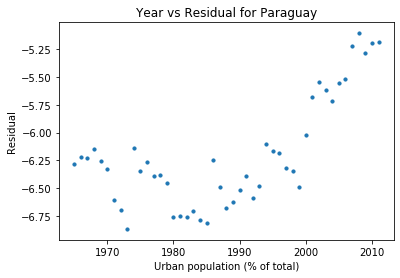

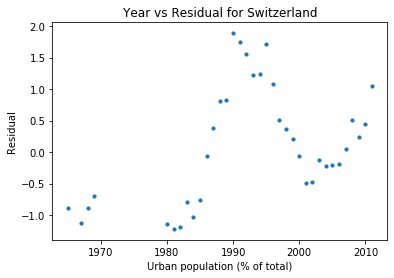

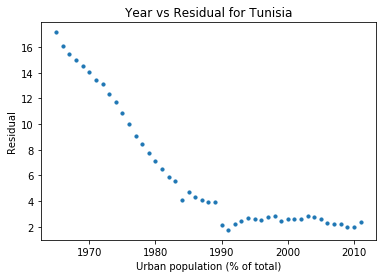

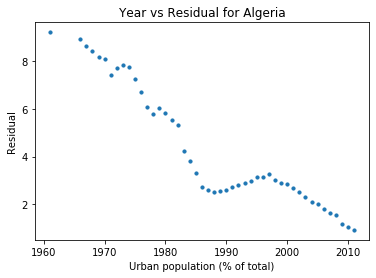

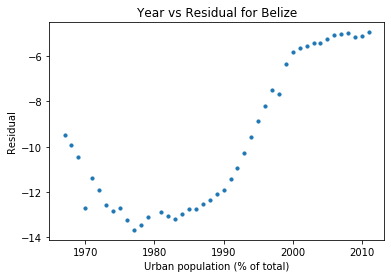

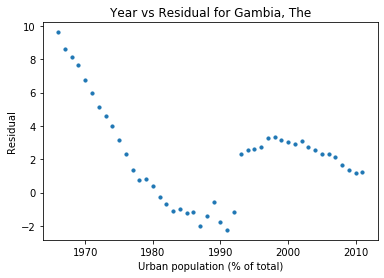

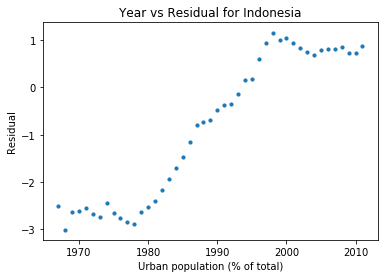

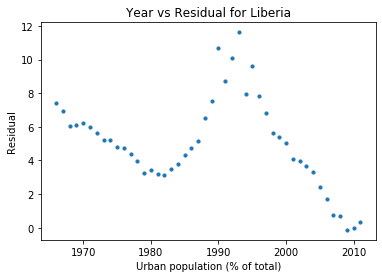

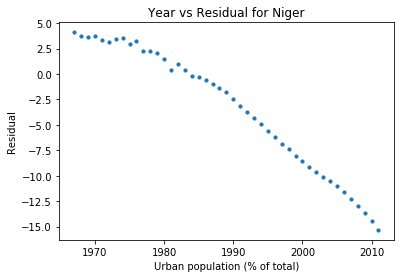

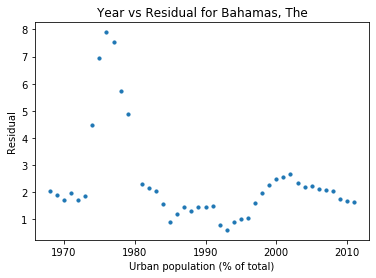

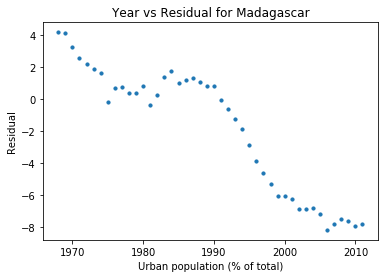

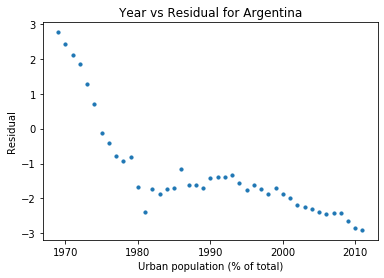

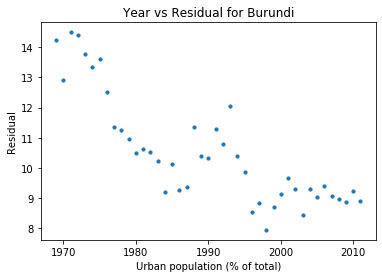

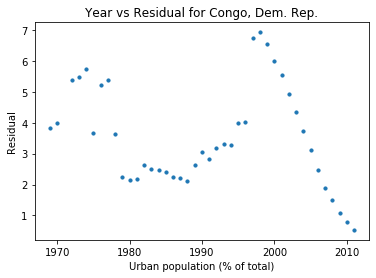

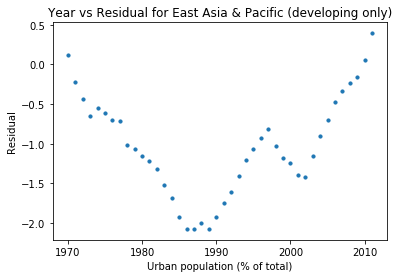

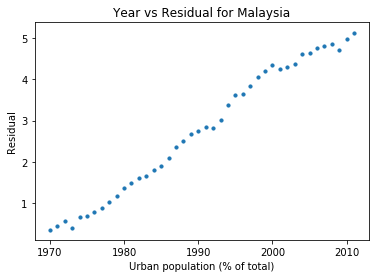

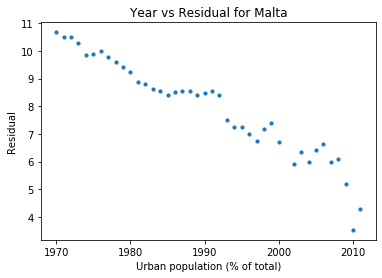

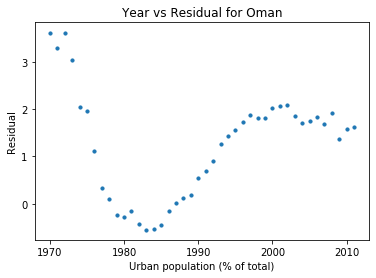

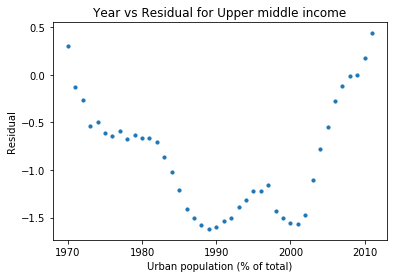

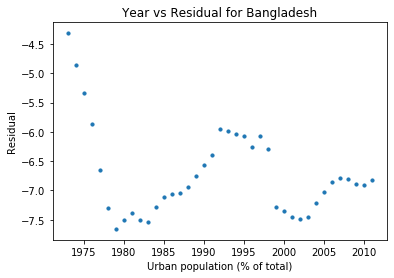

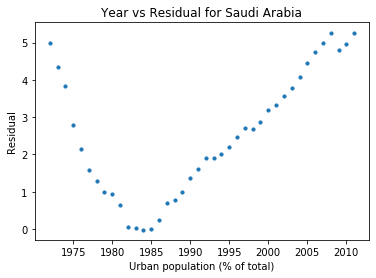

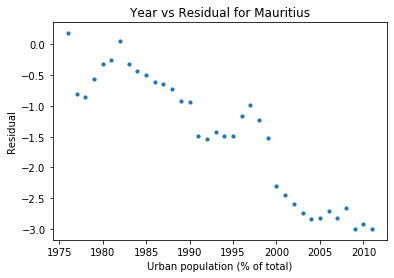

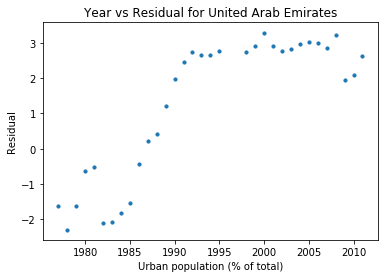

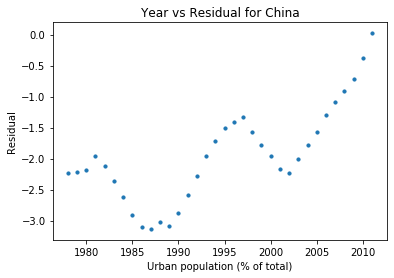

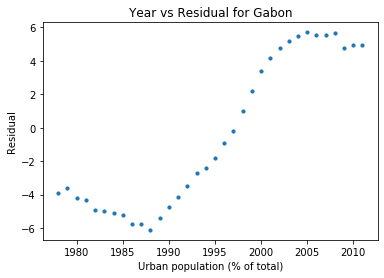

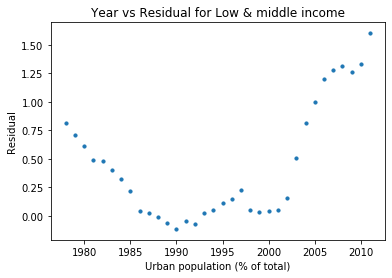

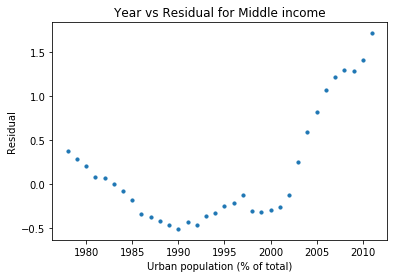

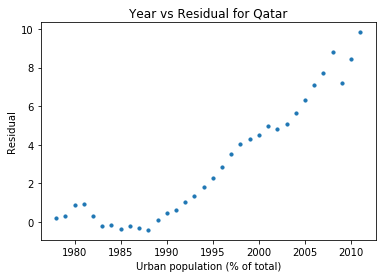

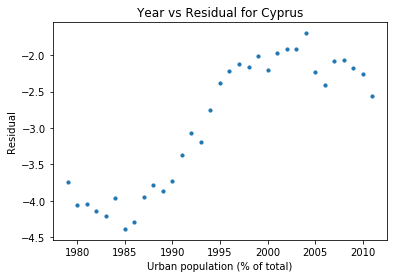

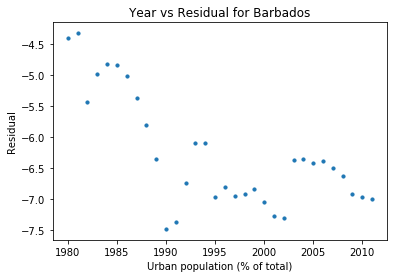

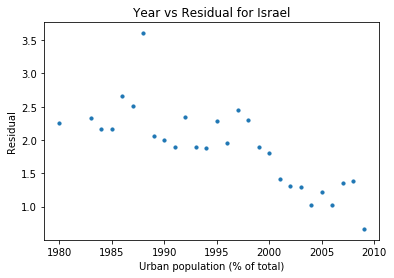

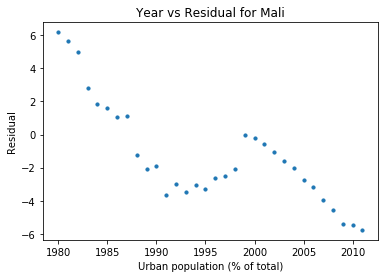

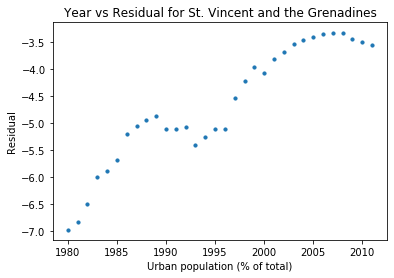

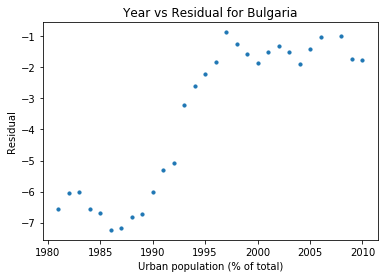

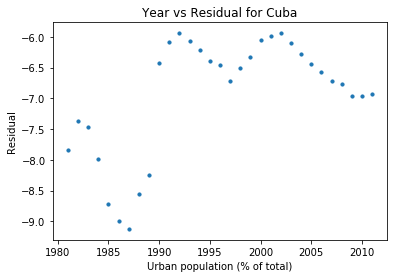

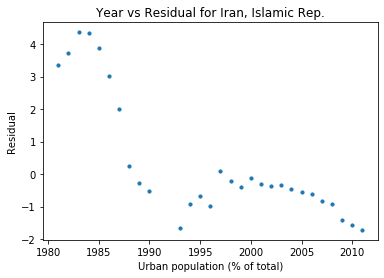

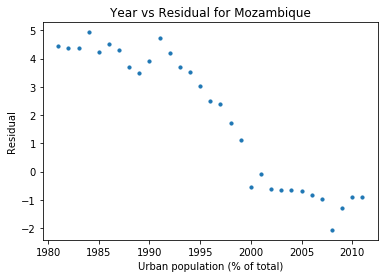

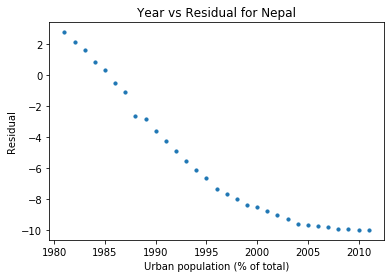

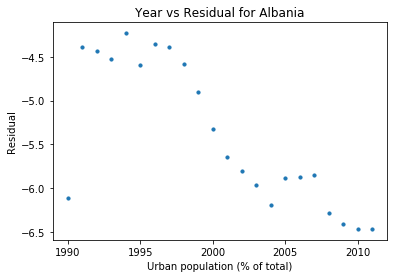

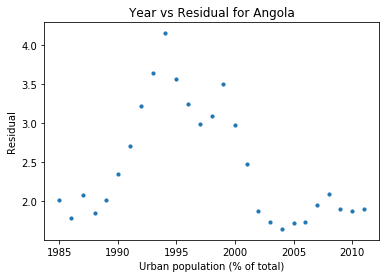

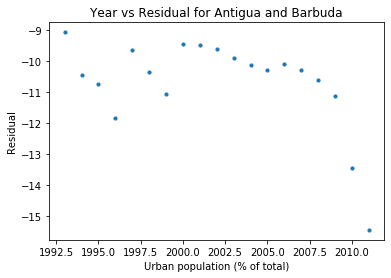

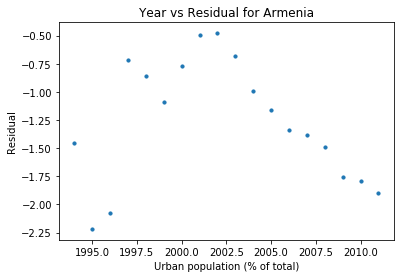

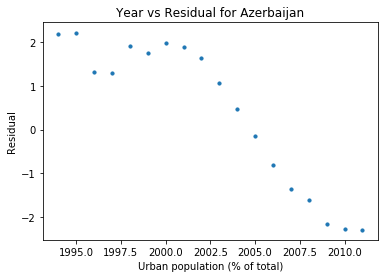

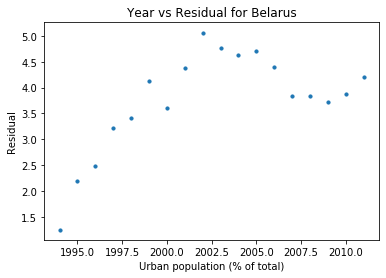

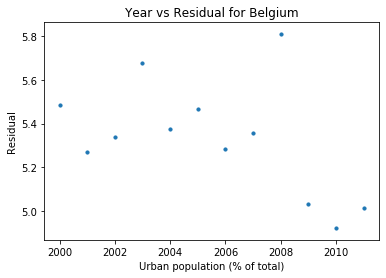

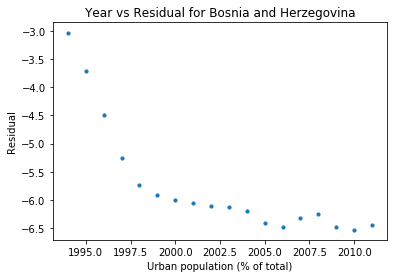

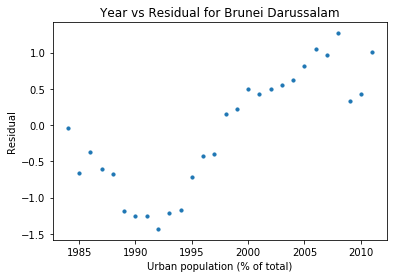

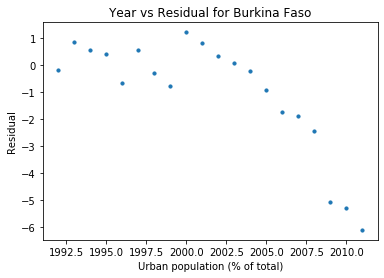

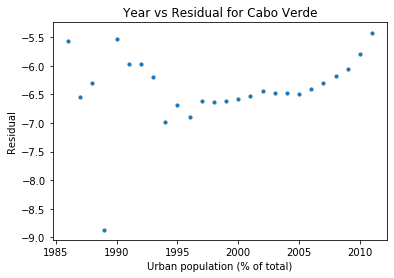

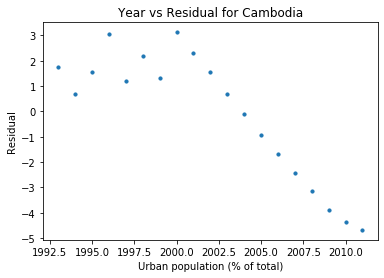

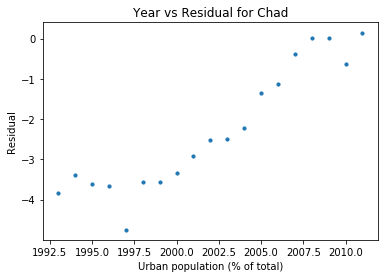

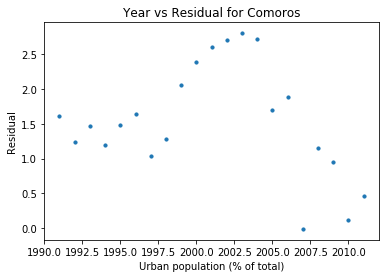

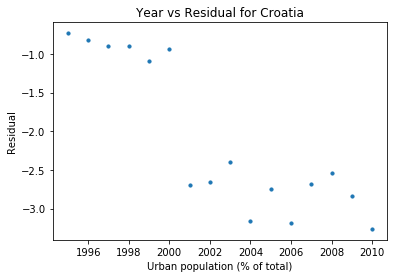

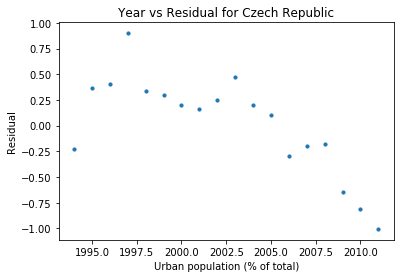

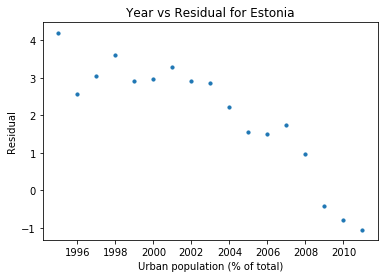

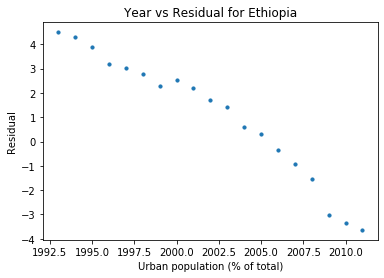

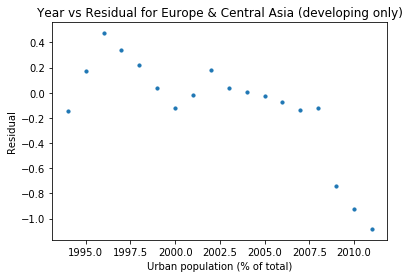

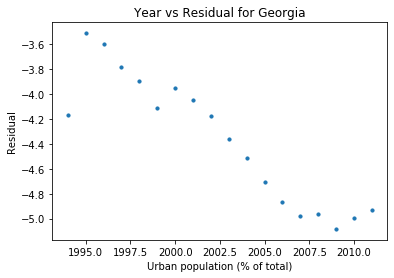

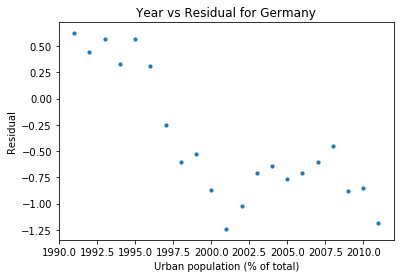

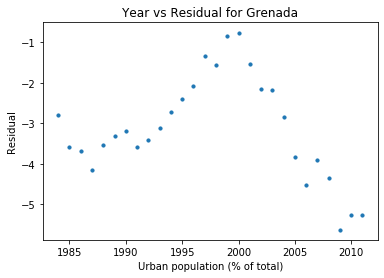

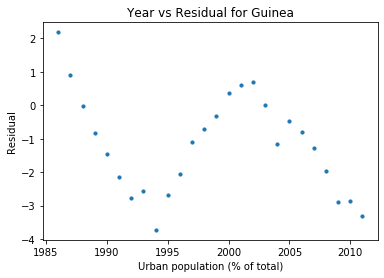

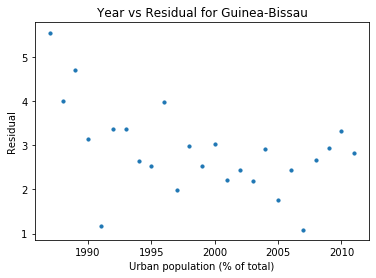

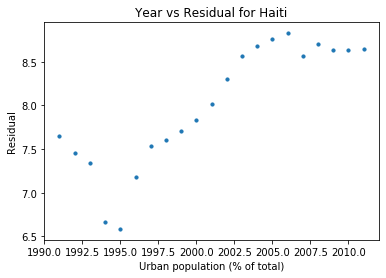

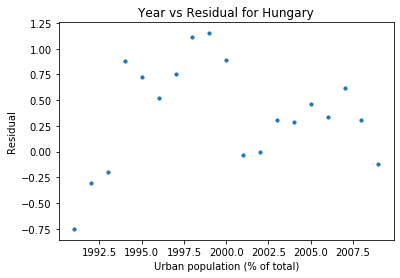

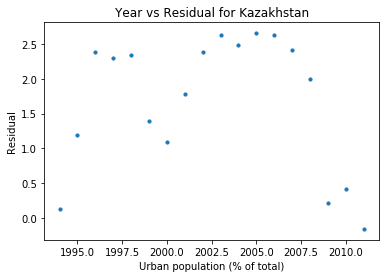

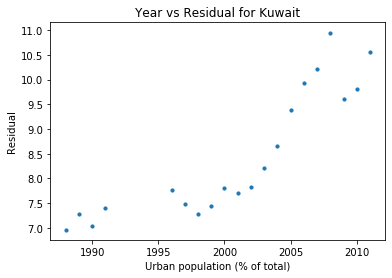

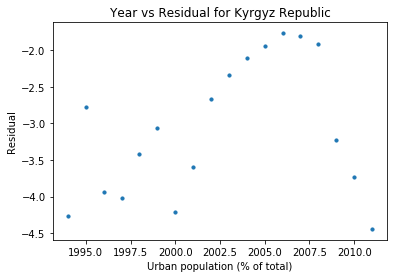

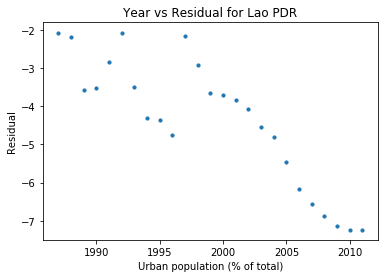

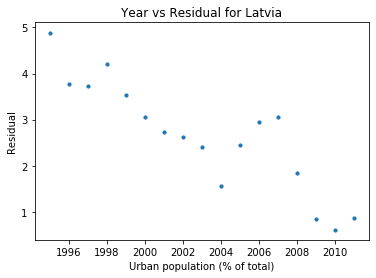

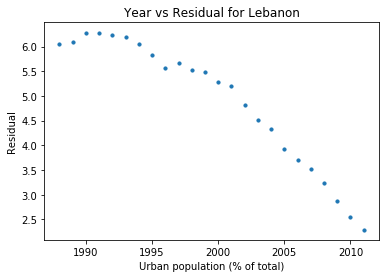

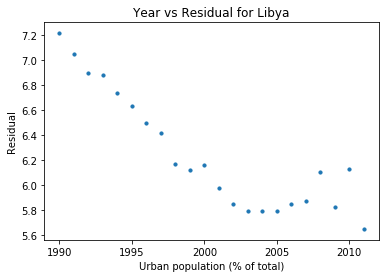

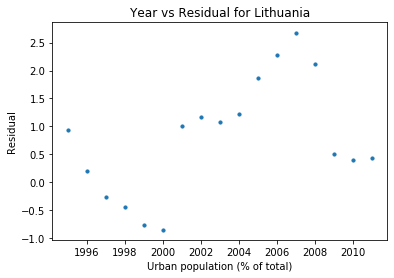

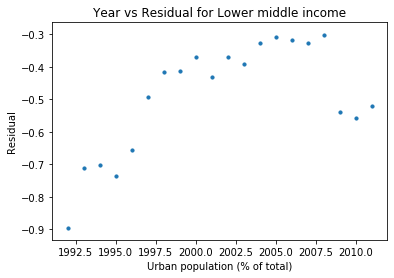

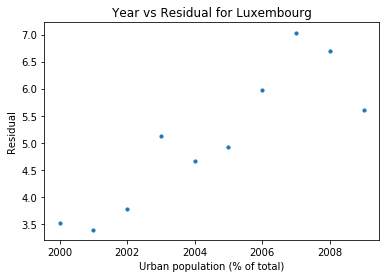

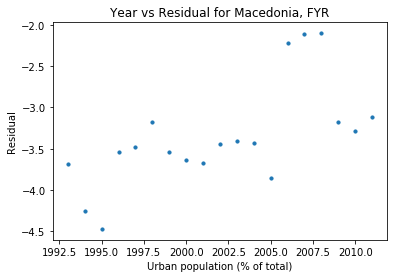

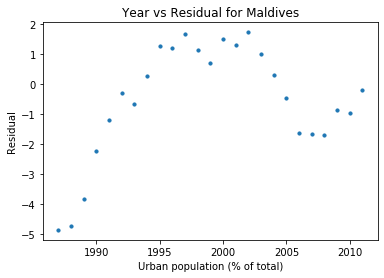

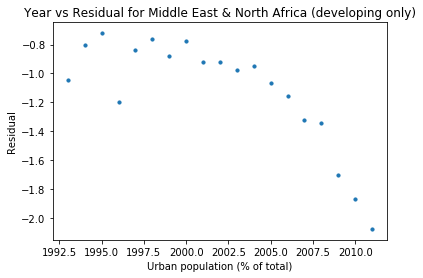

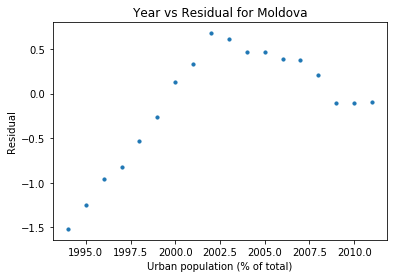

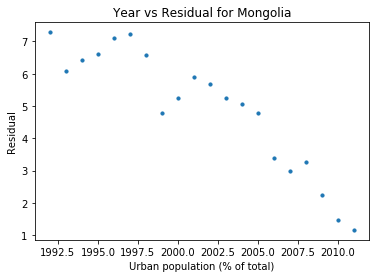

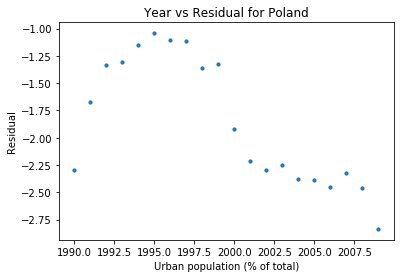

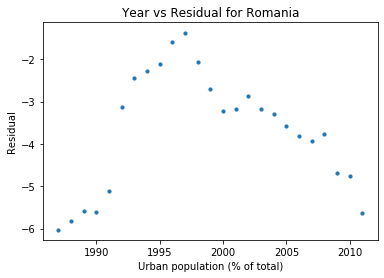

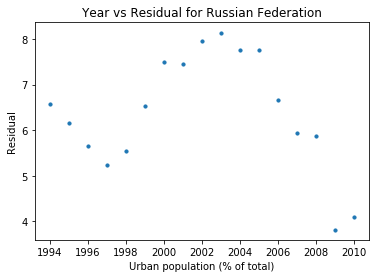

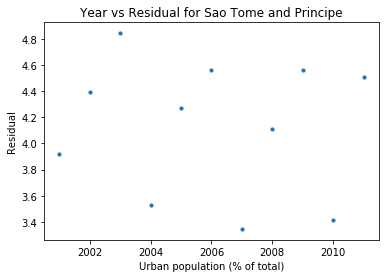

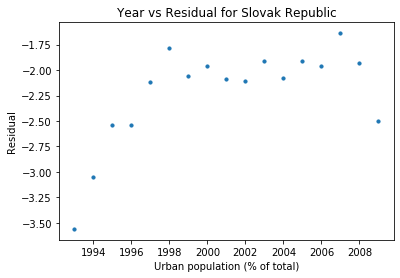

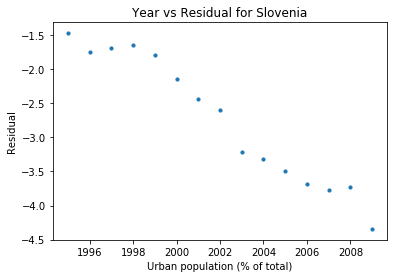

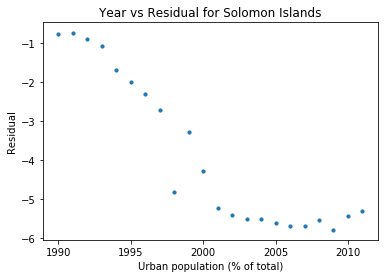

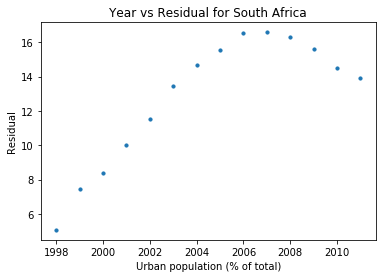

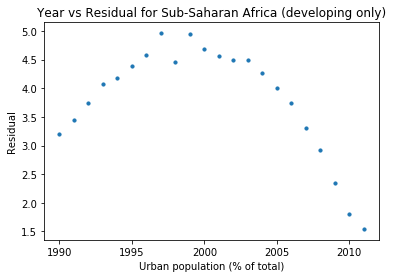

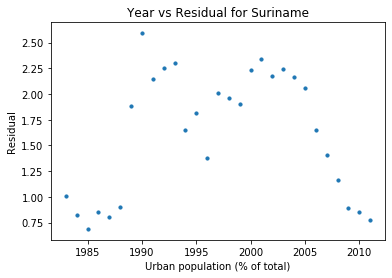

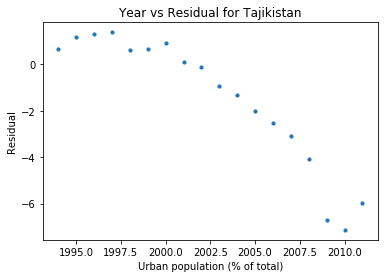

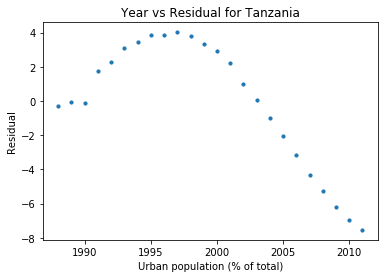

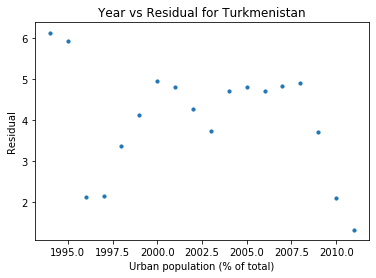

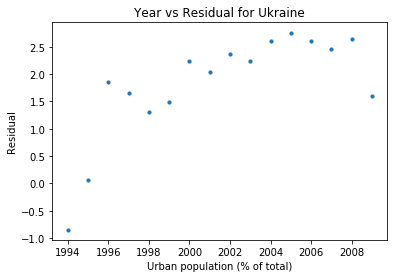

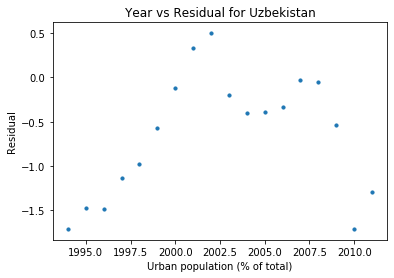

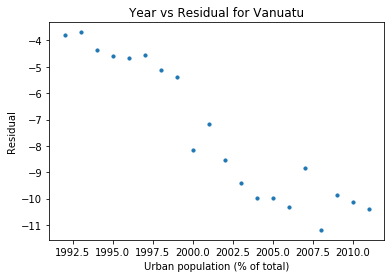

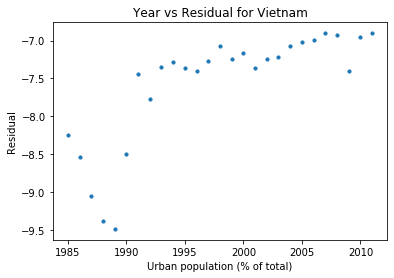

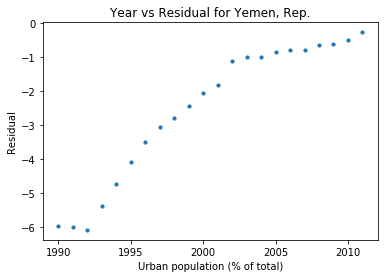

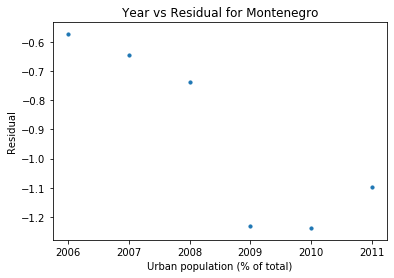

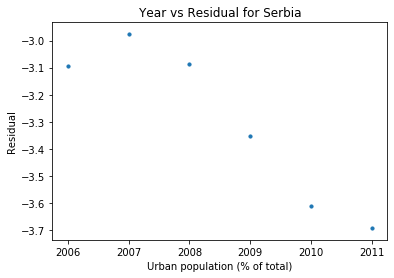

In [107]:
for country in byCountryResiduals['CountryName'].unique():
    plotByCountryTimeResiduals(country)

In [109]:
len(byCountryResiduals['CountryName'].unique())

173

In [ ]:
pp = PdfPages('plot.pdf')


for i in range(36):
    fig = plt.figure(figsize=(16,24))
    axs = fig.axes
    gs = fig.add_gridspec(ncols=4, nrows=6)
    axs = gs.subplots()

    pp.savefig()

pp.close()